## Modeling
#### Nesta fase os dados foram preparados para integração em modelos de machine learning na fase de Modeling
#### As séries temporais "male", "female", "young" e "adult" foram retiradas dos dados uma vez que o nosso objetivo é orientado para a série "all"
#### A coluna "date" também foi removida porque apenas serve para nos situarmos no tempo, para a divisão dos dados em antigos=treino, recentes=teste. Além disso a sua natureza única (única por observação) apenas iria trazer incerteza para os modelos.
#### Para lidar com os valores outliers foram criados 2 cenários:
<ul>
    <li><b>Com outliers</b> - Neste cenário os valores outliers não foram tratados</li>
    <li><b>Sem outliers s/ compensação</b> - Neste cenário os valores outliers foram tratados</li>

</ul>

#### Por fim os dados de cada cenário foram exportados para os respetivos ficheiros csv para poderem ser utilizados nas fases seguintes 

In [162]:
# Importar Libraries
library(tidyverse)
library(rminer)
library(forecast)
library(rjson)

ERROR: Error in library(rjson): there is no package called 'rjson'


In [2]:
# Importar os dados
data <- read.csv(file = './exported data/dadosPrep.csv')

# Retirar a coluna X (Index)
data = data %>% select(-X)
head(data)

all,weather,maxtemp,RH,maxwind
2332,0,13,87,0
2801,0,14,94,45
2375,0,14,82,55
3447,1,13,78,0
4823,0,16,81,37
4978,0,16,73,0


## Multivariate Regression

### Spliting the dataset (For multivariate models)

In [9]:
# Separação dos índices do dataframe ordenada cronologicamente (porque os dados já estão em ordem cronológica), usando 250
# observações para treino e 7 para teste
H=holdout(data$all,ratio=7,mode="order")
H

# Seleção dos dados de Treino
train = data[H$tr,]
cat("Dados de treino:\n")
cat("Head: ", head(train$all),"\n")
cat("Length: ", length(train$all),"\n\n")

# Seleção dos dados de Teste
test = data[H$ts,]
cat("Dados de teste:\n")
cat("Head: ", head(test$all),"\n")
cat("Length: ", length(test$all))

$tr
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250

$itr
NULL

$val
NULL

$ts
[1] 251 252 253 254 255 256 257

Dados de treino:
Head:  2332 2801 2375 3447 4823 4978 
Length:  250 

Dados de teste:
Head:  4974 3228 3191 4153 4307 4660 
Length:  7

### Modelos de Regressão Multivariados

#### Random Forest

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3764.005 3833.647 3695.257 3748.338 3259.948 4058.153 3768.615 
MAE: 971.12 
NMAE: 32.35 


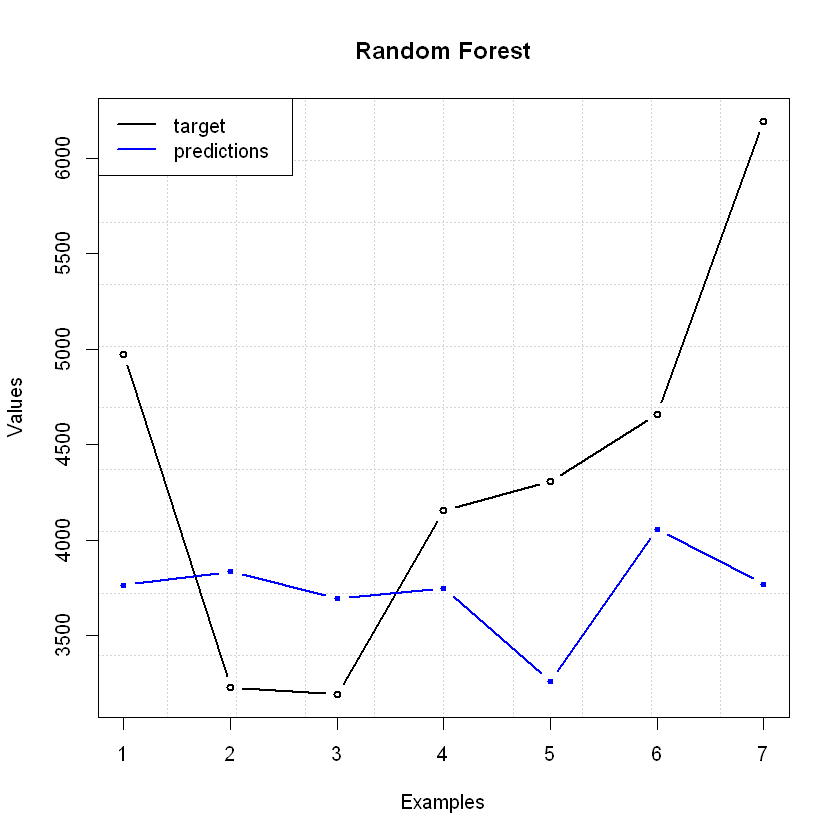

In [118]:
RF=fit(all~.,train,model="randomForest")
Target = test$all
cat("Target Values:",Target,"\n")

Pred = predict(RF,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Random Forest")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### Multiple Linear Regression

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3187.233 3168.647 2932.272 3042.532 2638.799 3109.731 3099.146 
MAE: 1361.09 
NMAE: 45.34 


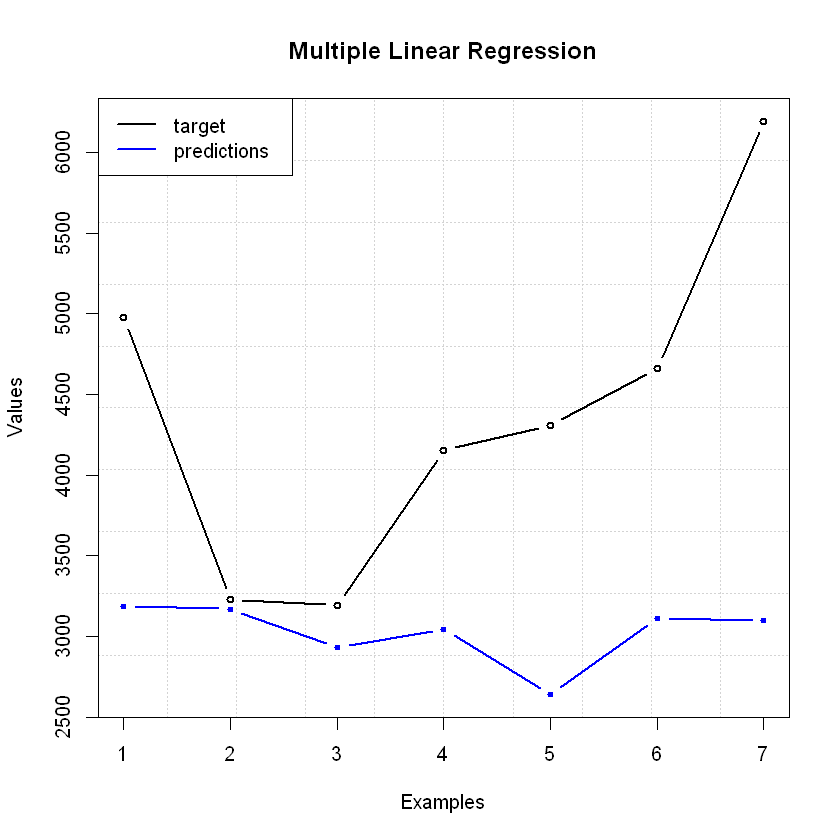

In [119]:
MR=fit(all~.,train,model="mr")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Multiple Linear Regression")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### KSVM

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3722.704 4228.571 3186.75 3328.989 2643.094 3847.016 3775.707 
MAE: 1139.19 
NMAE: 37.95 


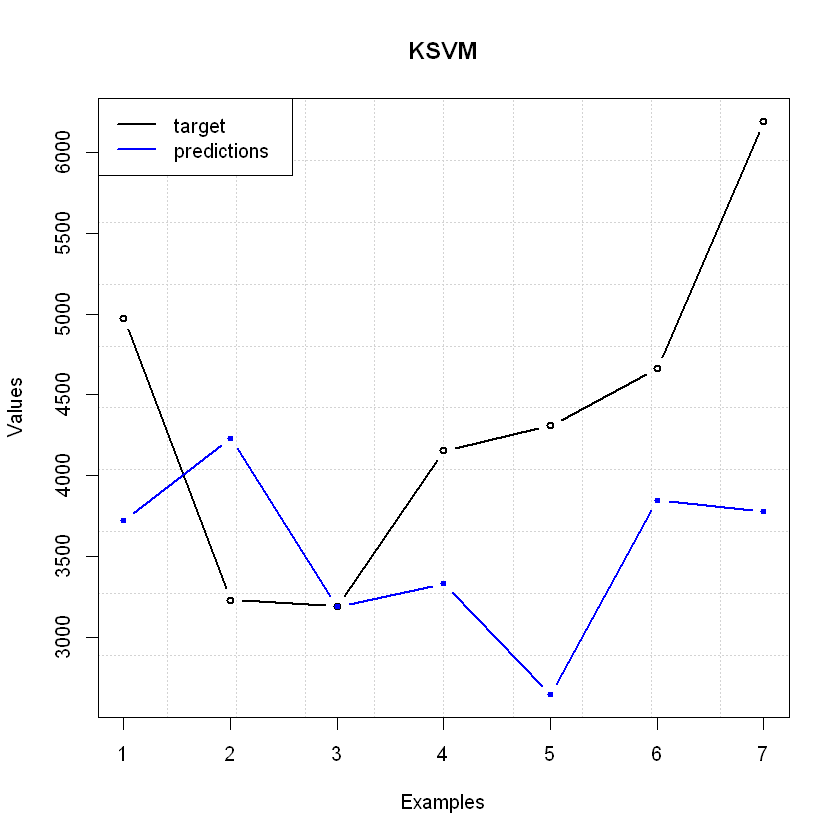

In [120]:
MR=fit(all~.,train,model="ksvm")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="KSVM")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### MLPE

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3566.065 3648.961 3393.688 3499.245 3587.181 3799.319 3790.773 
MAE: 952.58 
NMAE: 31.73 


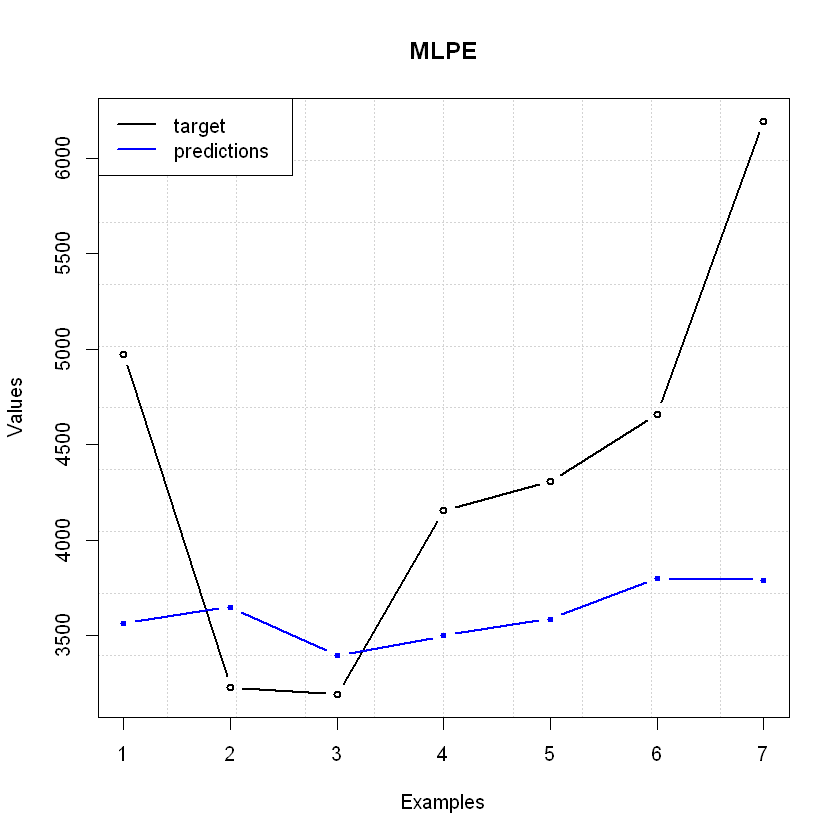

In [126]:
MR=fit(all~.,train,model="mlpe")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="MLPE")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

### CasesSeries (Testes)

In [157]:
cs = CasesSeries(data$all,c(1:7))

In [158]:
NN=rminer::fit(y~.,cs[1:243,],model="mlpe",search="heuristic")
PNN=predict(NN,cs[244:250,])
PNN

cat("MAE=",mmetric(cs[244:250,]$y,PNN,metric="MAE",val=srange),"\n")

[1] 6442.120 3270.505 3091.106 1733.984 3829.569 4595.195 8321.790

MAE= 957.2231 


In [159]:
cs[244:250,]$y

[1] 4974 3228 3191 4153 4307 4660 6193

In [160]:
NN=rminer::fit(all~.,train,model="mlpe",search="heuristic")
PNN=predict(NN,test)
PNN

cat("MAE=",mmetric(test$all,PNN,metric="MAE",val=srange),"\n")

[1] 4927.919 3481.773 4918.558 4929.022 4921.613 4895.982 4901.218

MAE= 706.5445 


## Time Series Forecast (Window Training)

In [245]:
Test=7 # H, the number of multi-ahead steps, adjust if needed
S=7 # step jump: set in this case to 4 months, a quarter
Runs=7 # number of growing window iterations, adjust if needed

In [246]:
# forecast:
W=(length(data$all)-Test)-(Runs-1)*S # initial training window size for the ts space (forecast methods)

# rminer:
timelags=c(1:7) # 1 previous month, 12 and 13 previous year months, you can test other combinations, such as 1:13
D=CasesSeries(data$all,timelags) # note: nrow(D) is smaller by max timelags than length(d1)
W2=W-max(timelags) # initial training window size for the D space (CasesSeries, rminer methods)

YR=diff(range(data$all)) # global Y range, use the same range for the NMAE calculation in all iterations

ev=vector(length=Runs) # error vector for "mlpe"
ev2=vector(length=Runs) # error vector for "Holtwinters"
ev3=vector(length=Runs) # error vector for "Arima"
ev4=vector(length=Runs) # error vector for "NN"
ev5=vector(length=Runs) # error vector for "RandomForest"


trinit=1

### Growing Window

In [247]:
for(b in 1:Runs)
{
  # Holdout and TS creation
  H=holdout(d1,ratio=Test,mode="incremental",iter=b,window=W,increment=S)   
  trinit=H$tr[1]
  dtr=ts(d1[H$tr],frequency=K) # create ts object, note that there is no start argument (for simplicity of the code)
    
  # HoltWinters(forecast)  
  M=suppressWarnings(HoltWinters(dtr)) # create forecasting model, suppressWarnings removes warnings from HW method
  Pred=forecast(M,h=length(H$ts))$mean[1:Test] # multi-step ahead forecasts
  ev2[b]=mmetric(y=d1[H$ts],x=Pred,metric="MAE",val=YR)
    
  # Arima(forecast)
  M3 = auto.arima(dtr)
  Pred3 = forecast(M3,h=length(H$ts))$mean[1:Test]
  ev3[b]=mmetric(y=d1[H$ts],x=Pred3,metric="MAE",val=YR)
    
  # Neural Network(forecast)
  M4 = nnetar(dtr,P=1,repeats=3)
  Pred4 = forecast(M4,h=length(H$ts))$mean[1:Test]
  ev4[b]=mmetric(y=d1[H$ts],x=Pred4,metric="MAE",val=YR)
    
  # Neural Network (Rminer)
  H2=holdout(D$y,ratio=Test,mode="incremental",iter=b,window=W2,increment=S)    
  M2=fit(y~.,D[H2$tr,],model="mlpe")
  Pred2=lforecast(M2,D,start=(length(H2$tr)+1),Test)
  ev[b]=mmetric(y=data$all[H$ts],x=Pred2,metric="MAE",val=YR)
  
  # Random Forest (Rminer)
  M5=fit(y~.,D[H2$tr,],model="lm")
  Pred5=lforecast(M5,D,start=(length(H2$tr)+1),Test)
  ev5[b]=mmetric(y=data$all[H$ts],x=Pred5,metric="MAE",val=YR)
}

In [248]:
cat("mlpe median MAE:",median(ev),"\n")
cat("HW median MAE:",median(ev2),"\n")
cat("Arima median MAE:",median(ev3),"\n")
cat("NN median MAE:",median(ev4),"\n")
cat("NN median MAE:",median(ev5),"\n")

mlpe median MAE: 916.0036 
HW median MAE: 567.1707 
Arima median MAE: 580.9973 
NN median MAE: 1243.631 
NN median MAE: 958.0034 


### Rolling Window

In [220]:
# Reset all metrics
ev=vector(length=Runs) # error vector for "mlpe"
ev2=vector(length=Runs) # error vector for "Holtwinters"
ev3=vector(length=Runs) # error vector for "Arima"
ev4=vector(length=Runs) # error vector for "NN"
ev5=vector(length=Runs) # error vector for "RandomForest"

for(b in 1:Runs)
{
  # Holdout and TS creation
  H=holdout(d1,ratio=Test,mode="rolling",iter=b,window=W,increment=S)   
  trinit=H$tr[1]
  dtr=ts(d1[H$tr],frequency=K) # create ts object, note that there is no start argument (for simplicity of the code)
    
  # HoltWinters(forecast)  
  M=suppressWarnings(HoltWinters(dtr)) # create forecasting model, suppressWarnings removes warnings from HW method
  Pred=forecast(M,h=length(H$ts))$mean[1:Test] # multi-step ahead forecasts
  ev2[b]=mmetric(y=d1[H$ts],x=Pred,metric="MAE",val=YR)
    
  # Arima(forecast)
  M3 = auto.arima(dtr)
  Pred3 = forecast(M3,h=length(H$ts))$mean[1:Test]
  ev3[b]=mmetric(y=d1[H$ts],x=Pred3,metric="MAE",val=YR)
    
  # Neural Network(forecast)
  M4 = nnetar(dtr,P=1,repeats=3)
  Pred4 = forecast(M4,h=length(H$ts))$mean[1:Test]
  ev4[b]=mmetric(y=d1[H$ts],x=Pred4,metric="MAE",val=YR)
    
  # Neural Network (Rminer)
  H2=holdout(D$y,ratio=Test,mode="incremental",iter=b,window=W2,increment=S)    
  M2=fit(y~.,D[H2$tr,],model="mlpe")
  Pred2=lforecast(M2,D,start=(length(H2$tr)+1),Test)
  ev[b]=mmetric(y=data$all[H$ts],x=Pred2,metric="MAE",val=YR)
  
  # Random Forest (Rminer)
  M5=fit(y~.,D[H2$tr,],model="lm")
  Pred5=lforecast(M5,D,start=(length(H2$tr)+1),Test)
  ev5[b]=mmetric(y=data$all[H$ts],x=Pred5,metric="MAE",val=YR)
}

In [221]:
# Medias de Metricas
cat("mlpe median MAE:",median(ev),"\n")
cat("HW median MAE:",median(ev2),"\n")
cat("Arima median MAE:",median(ev3),"\n")
cat("NN median MAE:",median(ev4),"\n")
cat("NN median MAE:",median(ev5),"\n")

mlpe median MAE: 857.7732 
HW median MAE: 686.8251 
Arima median MAE: 741.5507 
NN median MAE: 1474.99 
NN median MAE: 958.0034 


### Simple Time Series Forecast

In [222]:
TS = data$all

K=7 # TS period (daily)

L=length(TS)
NTS=K # number of predictions (7)
H=NTS # from 1 to H ahead predictions (7)
LTR=L-H
# according to the ts function documentation: frequency=7 assumes daily data, frequency=4 or 12 assumes quarterly and monthly data
TR=ts(TS[1:LTR],frequency=K)

# target predictions:
Y=TS[(LTR+1):L]

### TSF Neural Network Rminer

      lag7            lag6            lag5            lag4      
 Min.   :  375   Min.   :  375   Min.   :  375   Min.   :  375  
 1st Qu.: 2564   1st Qu.: 2565   1st Qu.: 2565   1st Qu.: 2578  
 Median : 3625   Median : 3636   Median : 3636   Median : 3636  
 Mean   : 3628   Mean   : 3638   Mean   : 3640   Mean   : 3643  
 3rd Qu.: 4304   3rd Qu.: 4312   3rd Qu.: 4312   3rd Qu.: 4312  
 Max.   :15735   Max.   :15735   Max.   :15735   Max.   :15735  
      lag3            lag2            lag1             y        
 Min.   :  375   Min.   :  375   Min.   :  375   Min.   :  375  
 1st Qu.: 2578   1st Qu.: 2578   1st Qu.: 2578   1st Qu.: 2578  
 Median : 3655   Median : 3655   Median : 3655   Median : 3667  
 Mean   : 3646   Mean   : 3644   Mean   : 3643   Mean   : 3657  
 3rd Qu.: 4312   3rd Qu.: 4308   3rd Qu.: 4308   3rd Qu.: 4312  
 Max.   :15735   Max.   :15735   Max.   :15735   Max.   :15735  
[1] 5626.506 2944.926 3879.475 3445.880 3195.655 3668.921 4061.239
MAE: 937.9086 


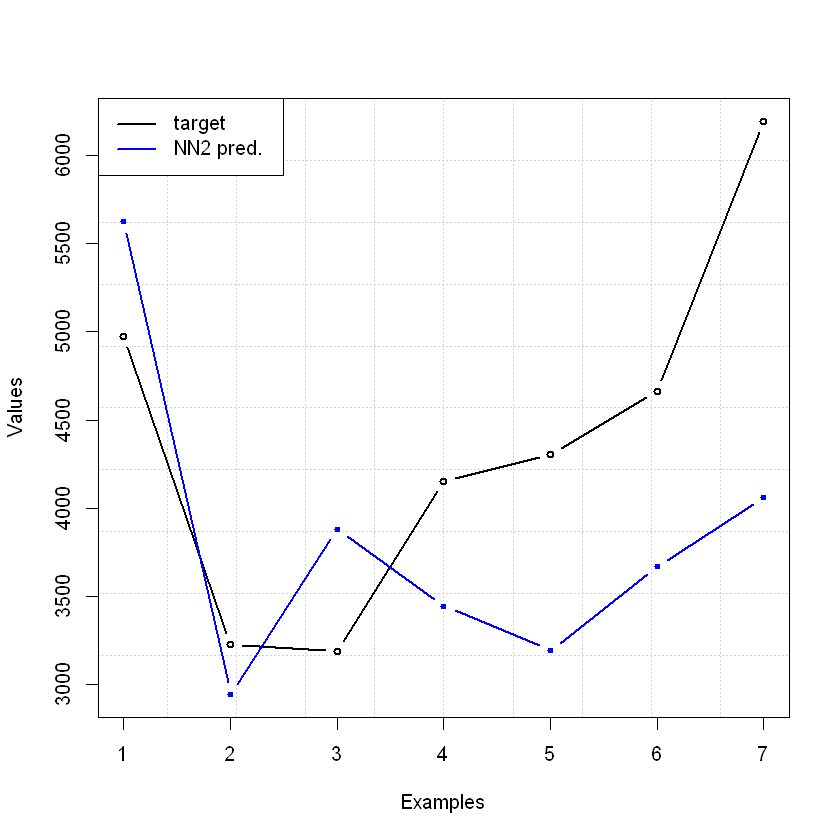

In [223]:
# neural network modeling, via rminer:
d=CasesSeries(TS,c(1:7)) # data.frame from time series (domain knowledge for the 1,12,13 time lag selection)
print(summary(d))
LD=nrow(d) # note: LD < L
hd=holdout(d$y,ratio=NTS,mode="order")
NN2=fit(y~.,d[hd$tr,],model="mlpe")
init=hd$ts[1] # or same as: init=LD-H+1
F5=lforecast(NN2,d,start=hd$ts[1],horizon=H)
print(F5)
Pred5=F5
mgraph(Y,Pred5,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","NN2 pred.")))
cat("MAE:",mmetric(Y,Pred5,metric="MAE"),"\n")

### TSF Random Forest RMiner

[1] 6852.686 4155.948 4244.913 3277.781 3846.433 5787.293 6575.399
MAE: 1961.467 


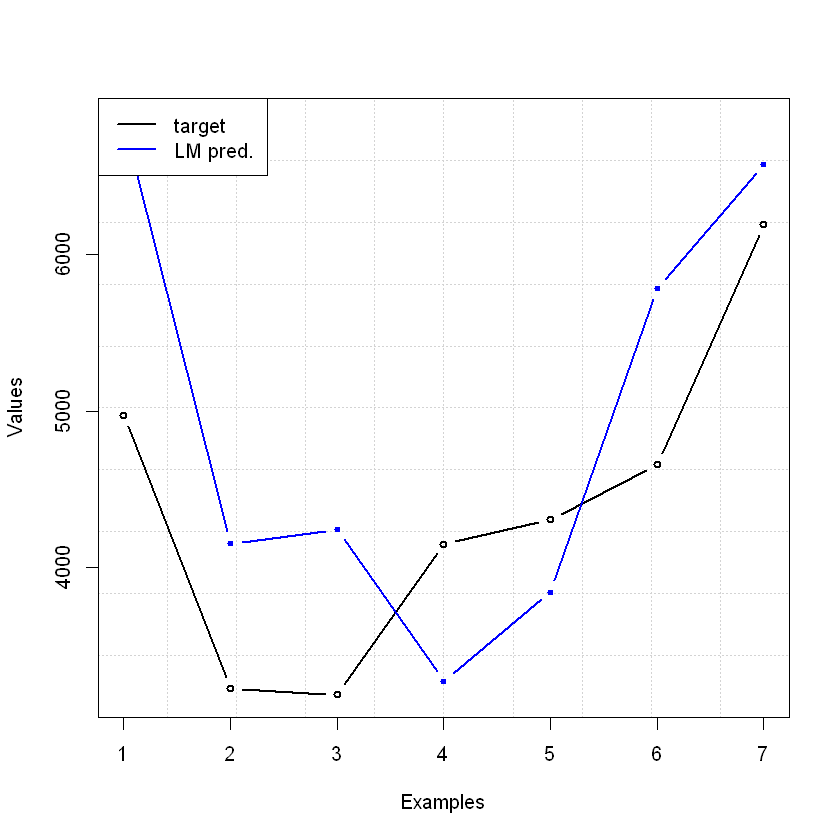

In [47]:
# random forest modeling, via rminer:
LM=fit(y~.,d[hd$tr,],model="lm")
init=hd$ts[1] # or same as: init=LD-H+1
F6=lforecast(LM,d,start=hd$ts[1],horizon=H)
print(F6)
Pred6=F6
mgraph(Y,Pred6,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","LM pred.")))
cat("MAE:",mmetric(Y,Pred5,metric="MAE"),"\n")

### TSF HoltWinters Forecast

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = TR)

Smoothing parameters:
 alpha: 0.2520264
 beta : 0.006189851
 gamma: 0.06395933

Coefficients:
          [,1]
a  5728.963667
b     6.113966
s1 1422.453791
s2 -487.701507
s3 -617.293636
s4 -532.871026
s5 -217.642027
s6  117.962967
s7 1536.118721
[1] "show holt winters forecasts:"
         Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
36.71429       7157.531 5417.020 8898.043 4495.649  9819.414
36.85714       5253.490 3457.888 7049.093 2507.353  7999.627
37.00000       5130.012 3280.309 6979.715 2301.136  7958.888
37.14286       5220.549 3317.648 7123.449 2310.313  8130.784
37.28571       5541.891 3586.618 7497.165 2551.558  8532.224
37.42857       5883.610 3876.720 7890.501 2814.337  8952.884
37.57143       7307.880 5250.070 9365.691 4160.731 10455.030


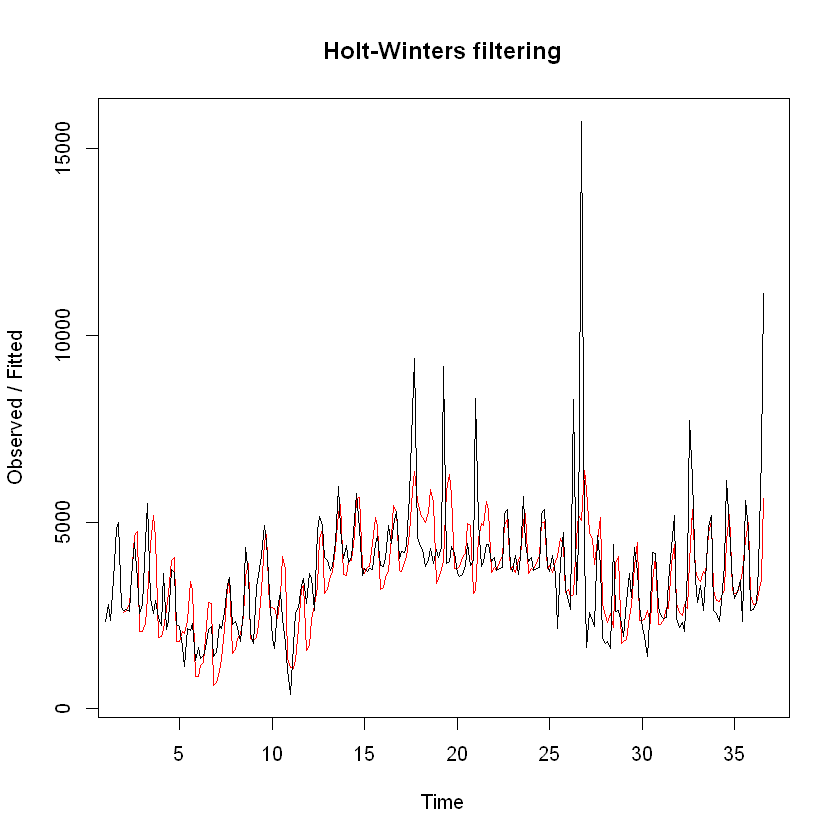

MAE: 1541.281 


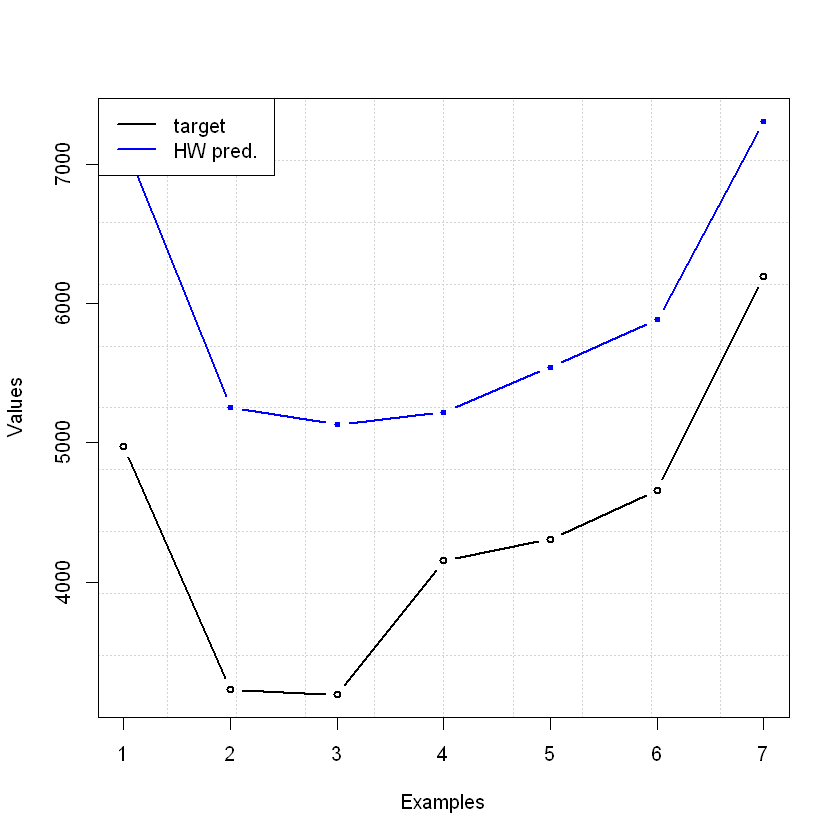

In [224]:
HW=suppressWarnings(HoltWinters(TR))
print(HW)
plot(HW)
print("show holt winters forecasts:")
# forecasts, from 1 to H ahead:
F=forecast(HW,h=7)
print(F)
Pred=F$mean[1:H] # HolWinters format
mgraph(Y,Pred,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","HW pred.")))
cat("MAE:",mmetric(Y,Pred,metric="MAE"),"\n")

### TSF Arima Forecast

Series: TR 
ARIMA(1,1,2)(0,0,2)[7] 

Coefficients:
          ar1      ma1      ma2    sma1    sma2
      -0.2240  -0.2929  -0.5906  0.1681  0.1292
s.e.   0.1255   0.1025   0.0842  0.0682  0.0603

sigma^2 estimated as 1868092:  log likelihood=-2149.54
AIC=4311.08   AICc=4311.42   BIC=4332.18
[1] "show ARIMA forecasts:"
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
36.71429       6523.476 4771.875 8275.077 3844.633 9202.318
36.85714       3824.681 1879.352 5770.010  849.557 6799.804
37.00000       4306.566 2361.183 6251.949 1331.359 7281.773
37.14286       4242.406 2286.688 6198.124 1251.394 7233.419
37.28571       4443.044 2480.868 6405.221 1442.154 7443.935
37.42857       4801.816 2832.425 6771.208 1789.892 7813.741
37.57143       5781.417 3805.014 7757.819 2758.770 8804.064
MAE: 577.2247 


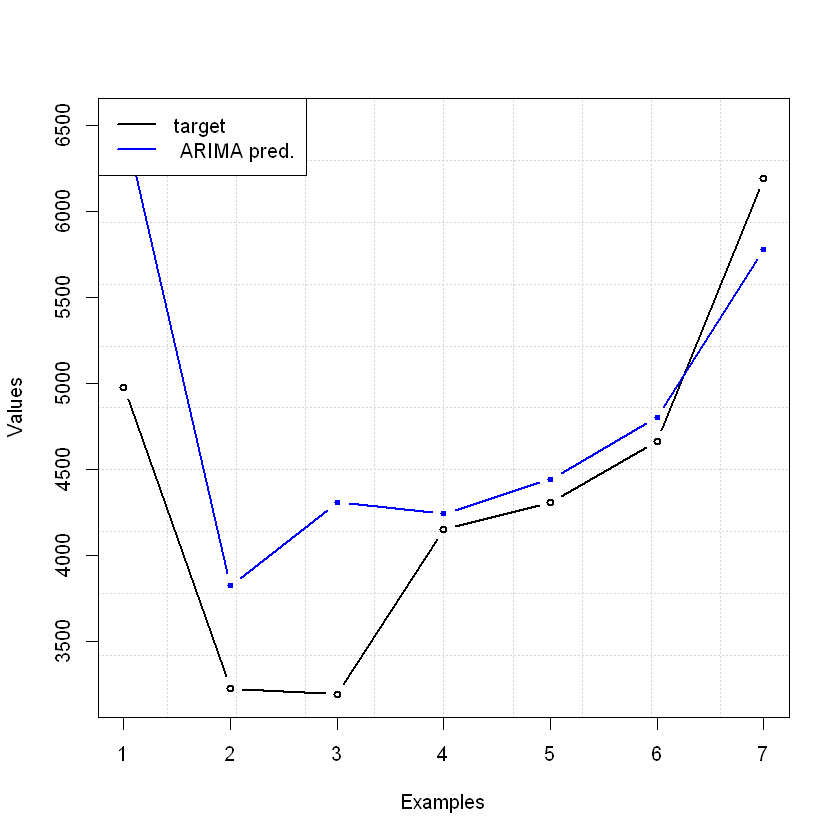

In [50]:
AR=auto.arima(TR)
print(AR) # ARIMA(3,0,1)(2,1,0)[12] 
print("show ARIMA forecasts:")
# forecasts, from 1 to H ahead:
F1=forecast(AR,h=H)
print(F1)
Pred1=F1$mean[1:H]
mgraph(Y,Pred1,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target"," ARIMA pred.")))
cat("MAE:",mmetric(Y,Pred1,metric="MAE"),"\n")

### TSF Neural Network Forecast

Series: TR 
Model:  NNAR(14,1,8)[7] 
Call:   nnetar(y = TR, P = 1, repeats = 3)

Average of 3 networks, each of which is
a 14-8-1 network with 129 weights
options were - linear output units 

sigma^2 estimated as 132488
MAE: 1008.35 


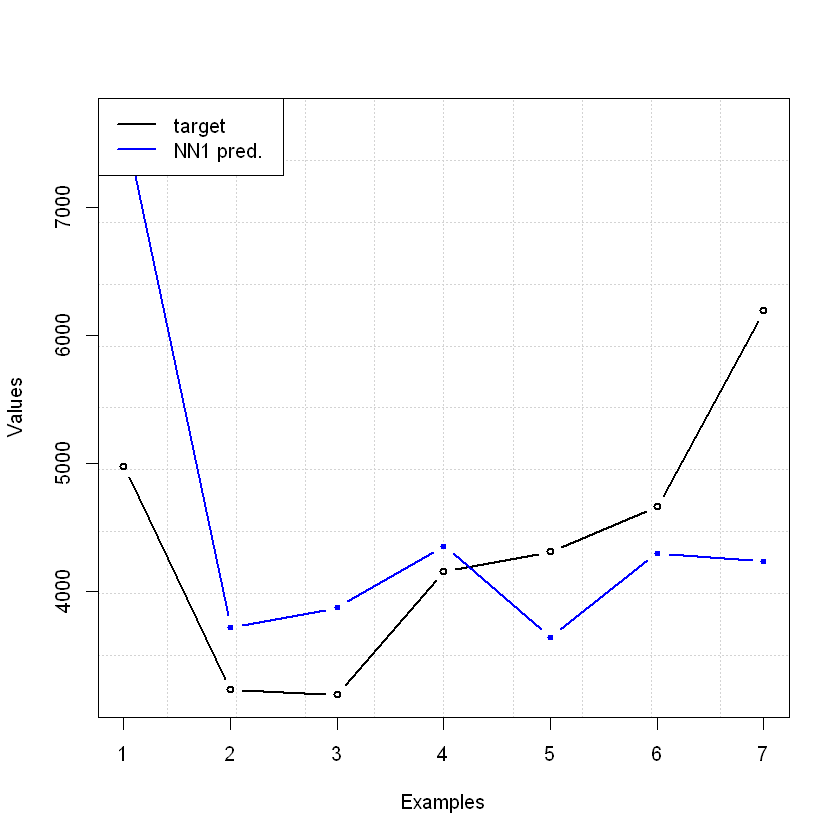

In [51]:
NN1=nnetar(TR,P=1,repeats=3)
print(NN1)
F3=forecast(NN1,h=H)
Pred3=F3$mean[1:H] # HolWinters format
mgraph(Y,Pred3,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","NN1 pred.")))
cat("MAE:",mmetric(Y,Pred3,metric="MAE"),"\n")

### TSF ETS Forecast

Series: TR 
Model:  NNAR(14,1,8)[7] 
Call:   nnetar(y = TR, P = 1, repeats = 3)

Average of 3 networks, each of which is
a 14-8-1 network with 129 weights
options were - linear output units 

sigma^2 estimated as 109142
MAE: 864.7843 


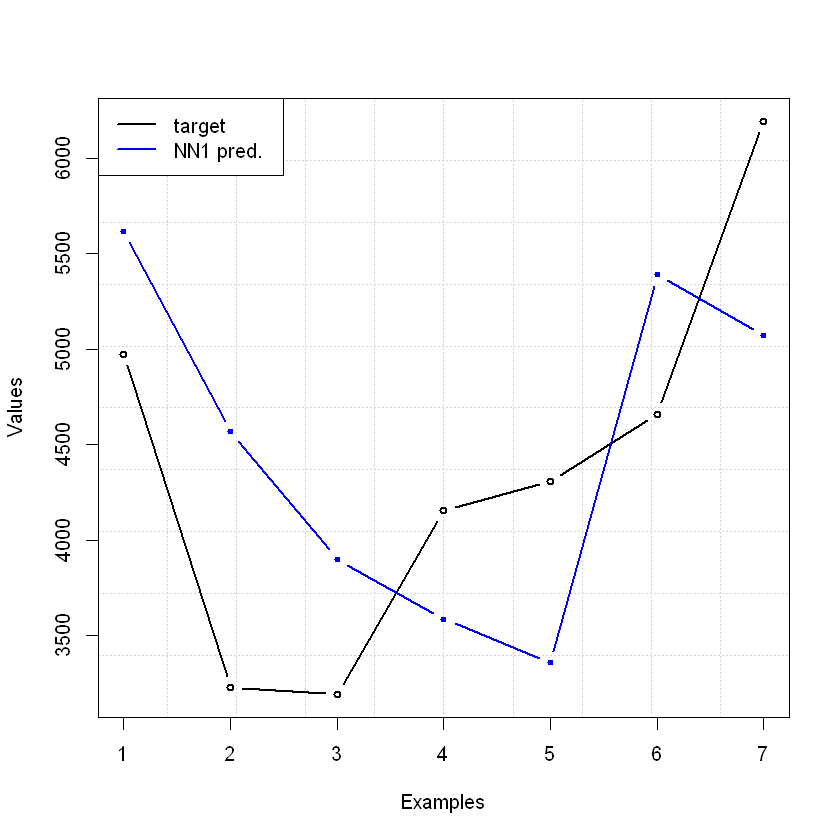

In [52]:
NN1=nnetar(TR,P=1,repeats=3)
print(NN1)
F3=forecast(NN1,h=H)
Pred3=F3$mean[1:H] # HolWinters format
mgraph(Y,Pred3,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","NN1 pred.")))
cat("MAE:",mmetric(Y,Pred3,metric="MAE"),"\n")

### TSF MLPE RMiner

SMAPE:  14.05 
MAE:  624.93 
NMAE:  20.82 


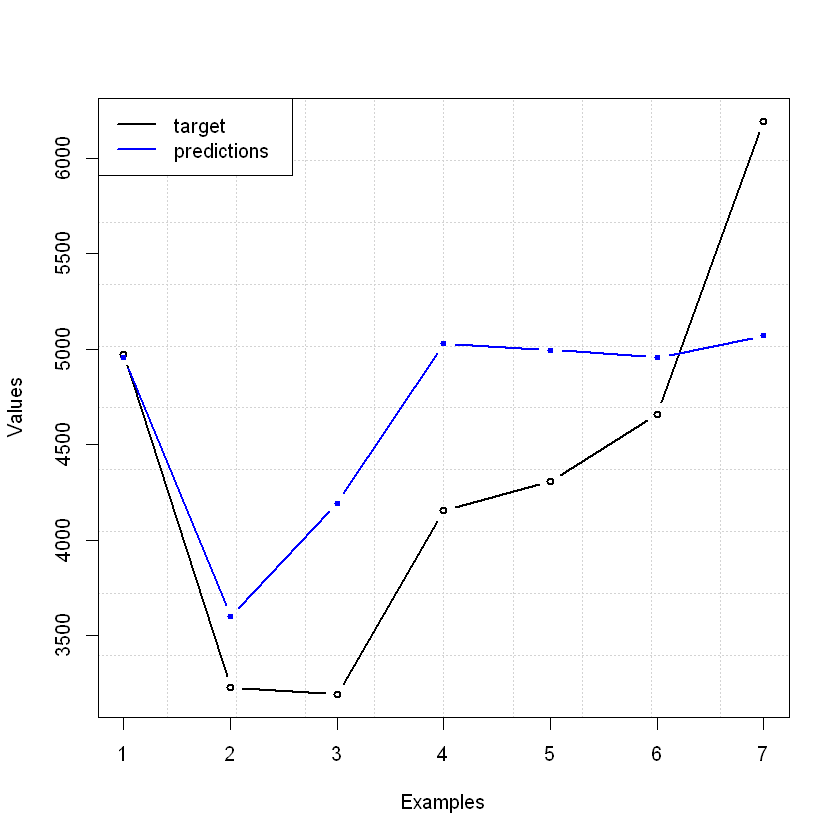

In [59]:
d1 = data[,1] #coluna all
L = length(d1)
K=7

timelags = c(1:7)
D = CasesSeries(d1,timelags)

H=holdout(data$all,ratio=7,mode="order")
M=fit(y~.,D[H$tr,],model="mlpe") # create forecasting model
Pred=lforecast(M,D,start=(length(H$tr)+1),7)

Target = d1[H$ts]

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

# last iteration predictions:
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")))

### Comparison TSF (Rminer)

In [261]:
d1 = data[,1] #coluna all
L = length(d1)
K=7

timelags = c(1:7)
D = CasesSeries(d1,timelags)

models <- c("lm","mlpe","naive","ctree","mlp","randomForest","mr","rvm")

H=holdout(data$all,ratio=7,mode="order")

Target = d1[H$ts]

In [268]:
for (x in 1:length(models)) {
  M=fit(y~.,D[H$tr,],model=models[x]) # create forecasting model
  Pred=lforecast(M,D,start=(length(H$tr)+1),7)
  mae = round(mmetric(Target,Pred,metric="MAE"),2)
  nmae = round(mmetric(Target,Pred,metric="NMAE"),2)
  cat(models[x]," - MAE - ",mae,"\n")
  cat(models[x]," - NMAE - ",nmae,"\n")
  cat("----------------------------------------------------------------- \n")
}

lm  - MAE -  513.39 
lm  - NMAE -  17.1 
----------------------------------------------------------------- 
mlpe  - MAE -  367.74 
mlpe  - NMAE -  12.25 
----------------------------------------------------------------- 
naive  - MAE -  985.45 
naive  - NMAE -  32.83 
----------------------------------------------------------------- 
ctree  - MAE -  781.12 
ctree  - NMAE -  26.02 
----------------------------------------------------------------- 
mlp  - MAE -  798.06 
mlp  - NMAE -  26.58 
----------------------------------------------------------------- 
randomForest  - MAE -  677.44 
randomForest  - NMAE -  22.57 
----------------------------------------------------------------- 
mr  - MAE -  513.39 
mr  - NMAE -  17.1 
----------------------------------------------------------------- 
rvm  - MAE -  2127.87 
rvm  - NMAE -  70.88 
----------------------------------------------------------------- 


### Comparison TSF (Forecast)

In [244]:
LTR = L-K
TS = ts(d1[1:LTR], frequency=7)


# HW
HW = suppressWarnings(HoltWinters(TS))
F=forecast(HW,h=7)
Pred=F$mean[1:7] # HolWinters format

mae = round(mmetric(Target,Pred,metric="MAE"),2)
nmae = round(mmetric(Target,Pred,metric="NMAE"),2)
cat("HW"," - MAE - ",mae,"\n")
cat("HW"," - NMAE - ",nmae,"\n")


# ARIMA
AR=auto.arima(TS)
F1=forecast(AR,h=7)
Pred1=F1$mean[1:7]

mae = round(mmetric(Target,Pred1,metric="MAE"),2)
nmae = round(mmetric(Target,Pred1,metric="NMAE"),2)
cat("ARIMA"," - MAE - ",mae,"\n")
cat("ARIMA"," - NMAE - ",nmae,"\n")


# NN
NN1=nnetar(TS,P=1,repeats=3)
F3=forecast(NN1,h=7)
Pred2=F3$mean[1:7] # HolWinters format

mae = round(mmetric(Target,Pred2,metric="MAE"),2)
nmae = round(mmetric(Target,Pred2,metric="NMAE"),2)
cat("NN"," - MAE - ",mae,"\n")
cat("NN"," - NMAE - ",nmae,"\n")


# ETS
ETS=ets(TS)
F4=forecast(ETS,h=7)
Pred3=F4$mean[1:7]

mae = round(mmetric(Target,Pred3,metric="MAE"),2)
nmae = round(mmetric(Target,Pred3,metric="NMAE"),2)
cat("ETS"," - MAE - ",mae,"\n")
cat("ETS"," - NMAE - ",nmae,"\n")

HW  - MAE -  1541.28 
HW  - NMAE -  51.34 
ARIMA  - MAE -  577.22 
ARIMA  - NMAE -  19.23 
NN  - MAE -  1003.2 
NN  - NMAE -  33.42 
ETS  - MAE -  1400.58 
ETS  - NMAE -  46.65 


## Modelo Hibrido 1

In [61]:
#Data Prep
d1 = data[,1] #coluna all
L = length(d1)
K=7

timelags = c(1:7)
D = CasesSeries(d1,timelags)

In [62]:
# Data Seperation
H=holdout(data$all,ratio=7,mode="order")
# Model Training
M=fit(y~.,D[H$tr,],model="mlpe") # create forecasting model
# Forecast
Pred=lforecast(M,D,start=(length(H$tr)+1),7)


SMAPE:  17.27 
MAE:  763.37 
NMAE:  25.43 


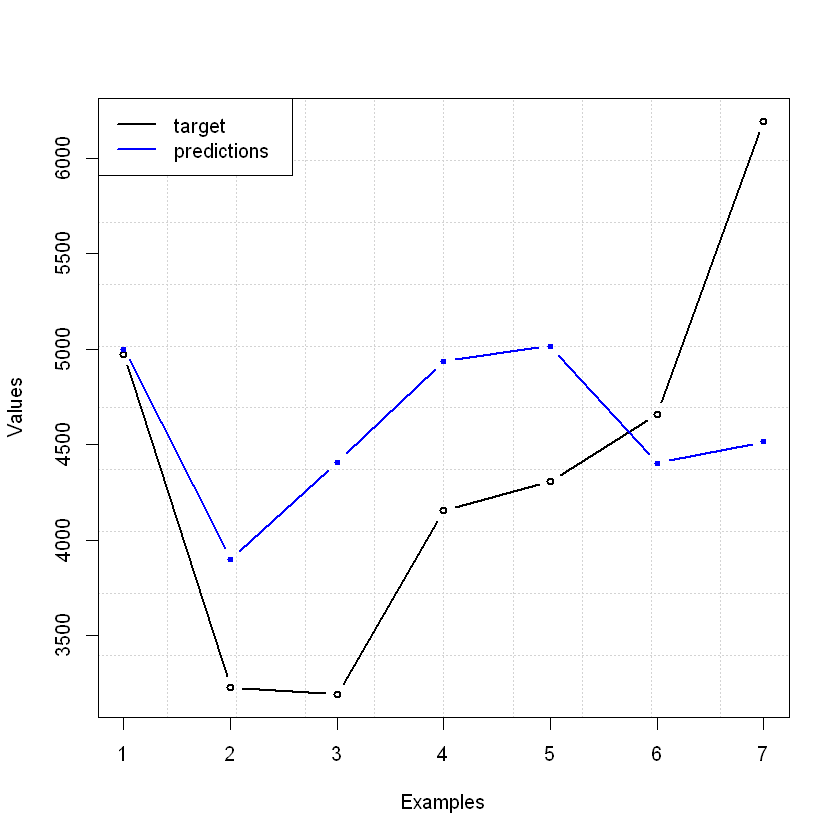

In [63]:
# Metrics
Target = d1[H$ts]

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

# last iteration predictions:
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")))

In [64]:
mfit=predict(M,D[H$tr,])
df1 = data.frame(mfit)
colnames(df1) <- "pred"
df2 = data.frame(Pred)
colnames(df2) <- "pred"
df3 = rbind(df1,df2)

nrow(df1)
nrow(df2)
nrow(df3)

[1] 250

[1] 7

[1] 257

In [65]:
bind = data.frame(cbind(data,df3))
head(bind)

all,weather,maxtemp,RH,maxwind,pred
2332,0,13,87,0,2330.618
2801,0,14,94,45,3381.073
2375,0,14,82,55,2848.203
3447,1,13,78,0,3199.309
4823,0,16,81,37,5264.732
4978,0,16,73,0,4206.824


Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 4838.179 3323.614 4771.04 4875.906 4803.471 4790.973 4813.521 
MAE: 648.76 
NMAE: 21.61 


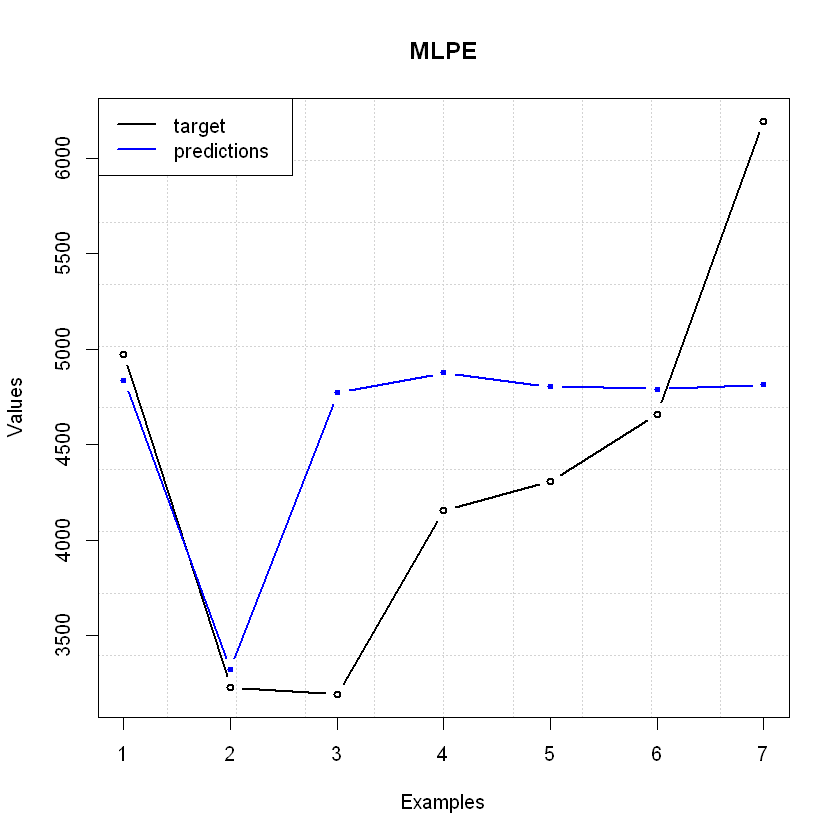

In [66]:
H=holdout(bind$all,ratio=7,mode="order")

# Seleção dos dados de Treino
train = bind[H$tr,]

# Seleção dos dados de Teste
test = bind[H$ts,]

MR=fit(all~.,train,model="mlpe")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="MLPE")

cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

In [ ]:
# Ciclo for com as varias configuracoes do metodo fit para descobrir quais sao as melhroes

### Modelo Hibrido 2

In [93]:
d1 = data[,1] # coluna all
L = length(d1) # 257
K=7

cat("incremental (growing) window training demonstration:")

Test=K # H, the number of multi-ahead steps, adjust if needed
S=K # step jump: set in this case to 7 predictions
Runs=7 # number of growing window iterations, adjust if needed (49 dias)

# forecast:
W=(L-Test)-(Runs-1)*S # initial training window size for the ts space (forecast methods)

# rminer:
timelags=c(1:7) # 1 previous day until 7 previous days
D=CasesSeries(d1,timelags) # note: nrow(D) is smaller by max timelags than length(d1)
W2=W-max(timelags) # initial training window size for the D space (CasesSeries, rminer methods)

YR=diff(range(d1)) # global Y range, use the same range for the NMAE calculation in all iterations

ev=vector(length=Runs) # error vector for "HoltWinters"
ev2=vector(length=Runs) # error vector for "mlpe"
ev3=vector(length=Runs) # error vector for hybrid

# growing window demo, rolling window can also be used:

# code for 1 iteration:
b=1

incremental (growing) window training demonstration:

In [94]:
for(b in 1:Runs)  # cycle of the incremental window training (growing window)
{
  # code for the forecast package methods, HoltWinters is just an example:
  H=holdout(d1,ratio=Test,mode="incremental",iter=b,window=W,increment=S)
  trinit=H$tr[1]
  dtr=ts(d1[H$tr],frequency=K) # create ts object, note that there is no start argument (for simplicity of the code)
  M=suppressWarnings(HoltWinters(dtr)) # create forecasting model, suppressWarnings removes warnings from HW method
  # get predictions for training data: fitted (243 obs treino)
  Mtrpred=M$fitted[1:nrow(M$fitted)] 

  Pred=forecast(M,h=length(H$ts))$mean[1:Test] # multi-step ahead forecasts (7 obs teste)
  ev[b]=mmetric(y=d1[H$ts],x=Pred,metric="MAE",val=YR)

  # code for rminer package methods, "mlpe" is just an example:
  H2=holdout(D$y,ratio=Test,mode="incremental",iter=b,window=W2,increment=S)   
     # note: the last training value is the same for dtr, namely:
     # print(dtr[length(dtr)])  
     # print(D[H2$tr[length(H2$tr)],]) # y is equal to previously shown value  
  M2=fit(y~.,D[H2$tr,],model="mlpe") # create forecasting model
  Pred2=lforecast(M2,D,start=(length(H2$tr)+1),Test) # multi-step ahead forecasts (7 obs de teste)
  ev2[b]=mmetric(y=d1[H$ts],x=Pred2,metric="MAE",val=YR)

  # get predictions for training data: predict (244 obs de treino)
  Mtrpred2=predict(M2,D[H2$tr,])

  # create new training and test dataset:
  TRSIZE=length(Mtrpred2) # 243
  LPRED=length(Pred2) # 7
  LMtr=length(Mtrpred) # 243 
  hwcolumn=c(Mtrpred[(LMtr-TRSIZE+1):length(Mtrpred)],Pred)
  mlpecolumn=c(Mtrpred2,Pred2) 
  HD=cbind(HW=hwcolumn,MLPE=mlpecolumn,y=D$y[1:(TRSIZE+LPRED)])
  HD=data.frame(HD)
  # fit a new hybrid model, say MLPE using 2 inputs HW and MLPE
  M3=fit(y~.,HD[1:TRSIZE,],model="mlpe") # create forecasting model
  # get new predictions, now predict can be used (since test data includes forecast and lforecast multi-step ahead predictions):
  Pred3=predict(M3,HD[(TRSIZE+1):(TRSIZE+LPRED),]) # multi-step ahead forecasts
  ev3[b]=mmetric(y=d1[H$ts],x=Pred3,metric="MAE",val=YR)
  
  cat("iter:",b,"TR from:",trinit,"to:",(trinit+length(H$tr)-1),"size:",length(H$tr),
      "TS from:",H$ts[1],"to:",H$ts[length(H$ts)],"size:",length(H$ts),
      "nmae:",ev[b],",",ev2[b],",",ev3[b],"\n")
} # end of cycle

iter: 1 TR from: 1 to: 208 size: 208 TS from: 209 to: 215 size: 7 nmae: 469.481 , 648.1563 , 700.2081 
iter: 2 TR from: 1 to: 215 size: 215 TS from: 216 to: 222 size: 7 nmae: 964.4839 , 1283.943 , 1196.44 
iter: 3 TR from: 1 to: 222 size: 222 TS from: 223 to: 229 size: 7 nmae: 392.281 , 556.815 , 519.6327 
iter: 4 TR from: 1 to: 229 size: 229 TS from: 230 to: 236 size: 7 nmae: 567.1707 , 892.2222 , 929.9241 
iter: 5 TR from: 1 to: 236 size: 236 TS from: 237 to: 243 size: 7 nmae: 383.2648 , 727.2062 , 1037.574 
iter: 6 TR from: 1 to: 243 size: 243 TS from: 244 to: 250 size: 7 nmae: 1610.784 , 1770.146 , 1709.344 
iter: 7 TR from: 1 to: 250 size: 250 TS from: 251 to: 257 size: 7 nmae: 1541.281 , 783.3119 , 690.1004 


In [95]:
# show median of ev and ev2
cat("median NMAE values for HW and mlpe:\n")
cat("Holt-Winters median NMAE:",median(ev),"\n")
cat("mlpe median NMAE:",median(ev2),"\n")
cat("hybrid median NMAE:",median(ev3),"\n")

median NMAE values for HW and mlpe:
Holt-Winters median NMAE: 567.1707 
mlpe median NMAE: 783.3119 
hybrid median NMAE: 929.9241 
